# Analyze Gaussian Jet properties


In [1]:
import copy
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm, Normalize
from IPython.display import clear_output
# settings
# plt.style.use("fivethirtyeight")

try:
    import PyBlastAfterglowMag as PBA
except:
    raise ImportError("Cannot import PyBlastAfterglowMag")
try:
    import afterglowpy as grb
except:
    afterglowpy = False
    print("Error! could not import afteglowpy")

from grbafg.tools import *
from settings import SettingsGaussian, SettingsGRB170917A

curdir = os.getcwd() + '/'

figs = os.getcwd()+"/figs/"
out = os.getcwd()+"/out/"
pdfs = "/home/vsevolod/Work/GIT/overleaf/grb_model_paper/figs/"

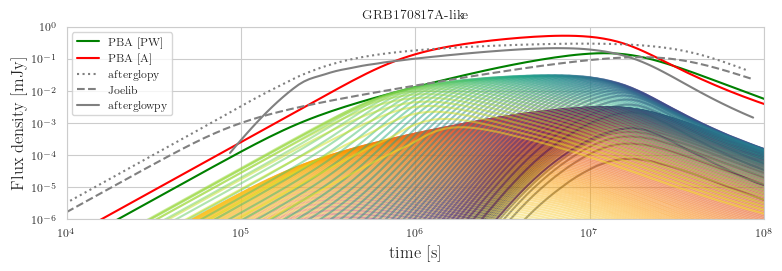

In [17]:
cases = CasesFS(default_parfile_fpath=curdir+"parfile_def.par",
                workingdir=curdir+"output/")
def plot_170817_like():
    
    tsk = SettingsGRB170917A() 
    
    fig, ax = plt.subplots(figsize=(9,2.5), ncols=1, nrows=1)
    
    cases.plot_170817_like(
        ax, struct=tsk.strucure, pars=tsk.pars, opts_a=tsk.opts_a, opts_pw=tsk.opts_pw
    )
    clear_output(wait=False)
    # plot

    ax.grid()
    ax.legend()
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("time [s]", fontsize=12)
    ax.set_ylabel("Flux density [mJy]", fontsize=12)
    ax.set_title("GRB170817A-like")
    ax.set_xlim(1e4,1e8)
    ax.set_ylim(1e-6,1)
    ax.grid()

    figname = "170817A_lcs_methods"
    plt.savefig(pdfs+figname+".pdf")
    plt.savefig(pdfs+figname+".png", dpi=256)
    plt.show()
plot_170817_like()

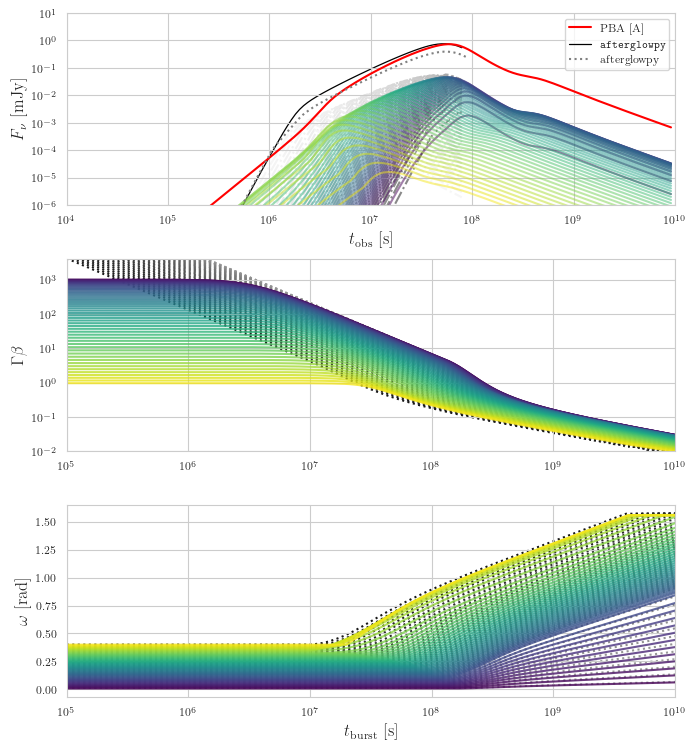

In [22]:
def plot_generic():
    
    tsk = SettingsGaussian()
    tsk.pars["theta_obs"] = 0.9
    tsk.pars["n_ism"] = 1e-2
    fig, axes = plt.subplots(figsize=(7,7.5), ncols=1, nrows=3)
    
    cases.plot_generic(axes, 
                       struct=tsk.structure, pars=tsk.pars, opts_a=tsk.opts_a, 
                       # ref_dyn_fname = "reference_afgpy_dyn.h5", ref_lc_fname="reference_lc_layer.h5",
                       ref_dyn_fname = "reference_afgpy_dyn_GamInf.h5", ref_lc_fname="reference_lc_layer_GamInf.h5"
                       )
    clear_output(wait=False)
    # adjust
    ax = axes[0]
    
    # ax.grid()
    ax.legend()
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(r"$F_{\nu}$ [mJy]", fontsize=12)
    ax.set_title(None)
    ax.set_xlim(1e4,1e10)
    ax.set_ylim(1e-6,1e1)
    ax.set_xlabel(r"$t_{\rm obs}$ [s]", fontsize=12)
    # ax.grid()
    
    ax = axes[1]
    # ax.grid()
    ax.set_ylabel(r"$\Gamma\beta$", fontsize=12)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylim(1e-2,4e3)
    ax.set_xlim(1e5,1e10)
    
    ax = axes[2]
    # ax.grid()
    # ax.legend()
    ax.set_ylabel(r"$\omega$ [rad]", fontsize=12)
    ax.set_xscale("log")
    ax.set_yscale("linear")
    ax.set_xlabel(r"$t_{\rm burst}$ [s]", fontsize=12)
    ax.set_xlim(1e5,1e10)
    
    plt.tight_layout()
    
    figname = "abstract_gaussian_ref_lcs_dyn"
    plt.savefig(pdfs+figname+".pdf")
    plt.savefig(pdfs+figname+".png", dpi=256)
    plt.show()
plot_generic()

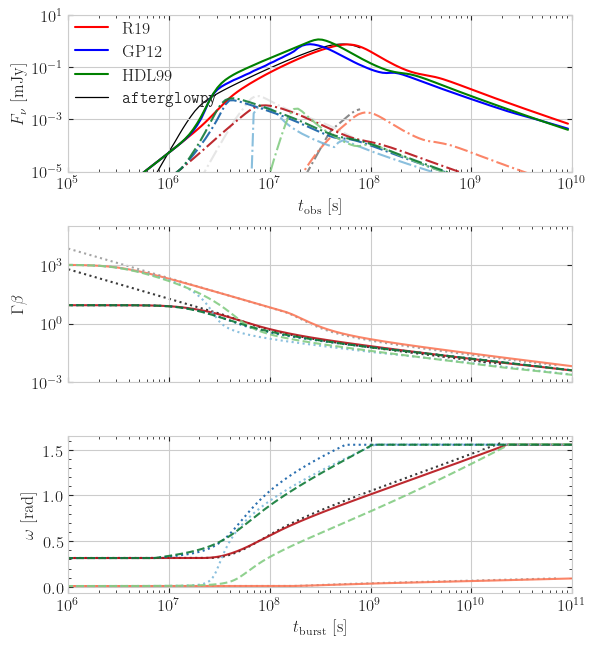

In [25]:
def paper_plot_compare_spreading():

    tsk = SettingsGaussian()

    pars = copy.deepcopy(tsk.pars)
    pars["n_ism"] = 1e-2
    # pars["p"] = 2.2
    tsk.pars["theta_obs"] = 0.9

    fig, axes = plt.subplots(figsize=(6,6.5), ncols=1, nrows=3)
    
    cases.paper_plot_compare_spreading(
        axes,struct=tsk.structure, pars=tsk.pars, opts_a=tsk.opts_a,
        ref_dyn_fname="reference_afgpy_dyn_GamInf.h5",
        ref_lc_fname="reference_lc_layer_GamInf.h5",
        layers=(0,40)
    )
    clear_output(wait=False)

    # plot
    ax = axes[0]
    # ax.grid()
    ax.legend(fancybox=True, loc='upper left',
              # bbox_to_anchor=(0.5, 0.5),  # loc=(0.0, 0.6),  # (1.0, 0.3), # <-> |
              shadow=False, ncol=1, fontsize=12,
              framealpha=0., borderaxespad=0.)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(r"$F_{\nu}$ [mJy]", fontsize=12)
    ax.set_xlabel(r"$t_{\rm obs}$ [s]", fontsize=12)
    # ax.set_title(title)
    ax.set_xlim(1e5,1e10)
    ax.set_ylim(1e-5,1e1)
    # ax.grid()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    # ax.set_facecolor("pink")
    
    ax = axes[1]
    # ax.grid()
    # ax.legend()
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(r"$\Gamma\beta$", fontsize=12)
    ax.set_xlim(1e6,1e11)
    ax.set_ylim(1e-3,1e5)
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.minorticks_on()
    # ax.set_facecolor("pink")
    
    ax = axes[2]
    # ax.grid()
    # ax.legend()
    ax.set_xscale("log")
    ax.set_yscale("linear")
    ax.set_ylabel(r"$\omega$ [rad]", fontsize=12)
    ax.set_xlabel(r"$t_{\rm burst}$ [s]", fontsize=12)
    ax.set_xlim(1e6,1e11)
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    ax.minorticks_on()
    # ax.set_facecolor("pink")
    
    plt.tight_layout()
    
    figname = "abstract_tophat_spread_methods_lcs_dyn"
    plt.savefig(pdfs+figname+".pdf")
    plt.savefig(pdfs+figname+".png", dpi=256)
    plt.show()
paper_plot_compare_spreading()